## Task 2

Create a neural net for Fashion MNIST with 100 hidden layers, using the sigmoid, ReLU, ELU, and SELU activation functions, and discuss the vanishing/exploding gradients problem using each of the mentioned activation functions.

In [8]:
import sys
import numpy as np
import matplotlib
import sklearn
import tensorflow as tf
import torch

print("Python:", sys.version)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("TensorFlow:", tf.__version__)
print("Keras:", tf.keras.__version__)
print("PyTorch:", torch.__version__)

Python: 3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
NumPy: 2.4.1
Matplotlib: 3.10.8
scikit-learn: 1.8.0
TensorFlow: 2.20.0
Keras: 3.13.1
PyTorch: 2.10.0+cpu


In [9]:

import matplotlib.pyplot as plt


# Split the data into training and testing
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', train_X.shape)
print('Test: X = ', test_X.shape)

print('Train: Y = ', train_Y.shape)
print('Test: Y = ', test_Y.shape)



Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)
Train: Y =  (60000,)
Test: Y =  (10000,)


In [10]:
train_X, train_Y, val_X, val_Y =  train_X[:-5000], train_Y[:-5000], train_X[-5000:], train_Y[-5000:]

print('Train: X = ', train_X.shape)
print('train: Y = ', train_Y.shape)

print('val: x = ', val_X.shape)
print('val: y = ', val_Y.shape)




Train: X =  (55000, 28, 28)
train: Y =  (55000,)
val: x =  (5000, 28, 28)
val: y =  (5000,)


In [20]:
def build_model(activation, layers=100):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    model.add(tf.keras.layers.Dense(64, activation=activation))

    for _ in range(layers - 1):
        model.add(tf.keras.layers.Dense(32, activation=activation))

    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [21]:
model_sigmoid = build_model('sigmoid')

model_sigmoid.summary()

c:\Users\beruk\DEEPLEARN-ING\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_404 (Dense)               │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_405 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_406 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_407 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_408 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_409 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_410 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_411 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_412 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_413 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_414 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_415 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_416 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_417 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_418 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_419 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_420 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_421 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_422 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_423 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_424 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_425 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_426 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_427 (Dense)               │ (None, 32)             │         1,05

 Total params: 156,138 (609.91 KB)

 Trainable params: 156,138 (609.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

sigmoid_history = model_sigmoid.fit(train_X, train_Y, epochs=5, validation_data=(val_X, val_Y))

Epoch 1/5
1716/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1005 - loss: 2.3122

In [ ]:
Relu_model = build_model('relu')
Relu_history = Relu_model.fit(train_X, train_Y, epochs=5, validation_data=(val_X, val_Y))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - loss: nan - val_loss: nan
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: nan - val_loss: nan
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: nan - val_loss: nan
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: nan - val_loss: nan
Epoch 5/5
 460/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: nan

KeyboardInterrupt: 

In [ ]:
Elu_model = build_model('elu')
Elu_history = Elu_model.fit(train_X, train_Y, epochs=5, validation_data=(val_X, val_Y))

Epoch 1/5


c:\Users\beruk\DEEPLEARN-ING\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1344/1344 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: -146278684033024.0000 - val_loss: -985132756369408.0000
Epoch 2/5
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: -12392957407657984.0000 - val_loss: -38056584223391744.0000
Epoch 3/5
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: -125912661408874496.0000 - val_loss: -264954110128685056.0000
Epoch 4/5
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: -575677796945231872.0000 - val_loss: -997412764727115776.0000
Epoch 5/5
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: -1763066207944048640.0000 - val_loss: -2725419395152084992.0000


In [ ]:
selu_model = build_model('selu')
selu_history = selu_model.fit(train_X, train_Y, epochs=5, validation_data=(val_X, val_Y))

Epoch 1/5


c:\Users\beruk\DEEPLEARN-ING\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1344/1344 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: -520485947310080.0000 - val_loss: -3504991813763072.0000
Epoch 2/5
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: -43921628354052096.0000 - val_loss: -135139273362898944.0000
Epoch 3/5
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: -450293648441999360.0000 - val_loss: -950295873978368000.0000
Epoch 4/5
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: -2052677020944433152.0000 - val_loss: -3553689200937140224.0000
Epoch 5/5
1344/1344 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: -6267426285044105216.0000 - val_loss: -9688622685566795776.0000


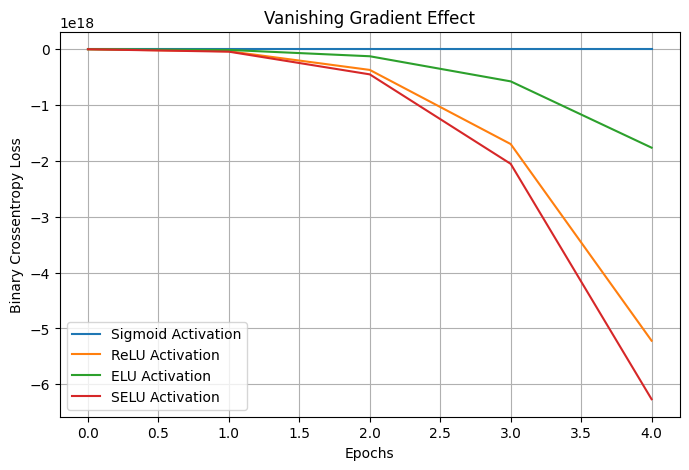

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(sigmoid_history.history['loss'], label='Sigmoid Activation')
plt.plot(Relu_history.history['loss'], label='ReLU Activation')
plt.plot(Elu_history.history['loss'], label='ELU Activation')
plt.plot(selu_history.history['loss'], label='SELU Activation')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Vanishing Gradient Effect')
plt.legend()
plt.grid(True)
plt.show()